<a href="https://colab.research.google.com/github/dannyycwang/ADA511-ML-course/blob/main/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic 01-1. Standard Fully Connected (Dense) Neural Network**

【Note】 TensorFlow 2 has introduced some changes, such as fully integrating Keras. As of 2023, certain details have also been updated. Therefore, we have modified the code according to the new standards. The biggest difference is that in the future, you can install TensorFlow directly without the need to install Keras separately. Other minor details include:



1.   predict_class has been replaced with predict followed by argmax.
2.   The learning rate parameter is now called learning_rate, instead of lr.


# 1. Load the pakages

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2. Loading the MNIST Database
MNIST is a dataset containing a collection of handwritten digits from 0 to 9. It consists of 60,000 training samples and 10,000 test samples. MNIST is the "Modified" version of the NIST database, which originally contained more data. This modified version was created by LeCun, Cortes, and Burges, among others. You can refer to the original webpage of this dataset for more information.

MNIST is arguably the most famous example in Deep Learning.

2.1 Loading MNIST with tf.Keras
tf.Keras thoughtfully provides the MNIST dataset for us, and we can load it like this (it may take some time the first time).

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

# 2.2 Contents of the Dataset
Each input (x) is an image of a handwritten digit from 0 to 9, with a size of 28x28. The output (y) is, of course, the "correct label" or answer. Let's take a look at the training data with index number 87.

In [ ]:
X = x_train[87]

In [ ]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        125, 225, 254, 254, 255, 254, 170,  48,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  43, 101, 250,
        253, 253, 253, 253, 253, 253, 253, 250, 161,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  94, 246, 247, 253,
        253, 196, 227, 116,  56, 253, 253, 253, 234,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 152, 253, 253, 180,
         19,   9,  15,   0,   4,  55, 253, 253, 166,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  41, 238, 253, 253, 125,
          0,   0,   0,  21, 189, 232, 253, 253, 117,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 219, 253, 220, 165,  34,
         92,  21,  52, 228, 253, 253, 241,  82,  13,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  38, 241, 170,  25,  20,  12,
         75,  39,  59, 253, 253, 253, 110,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 112, 253, 236,  67,   0,   0,
          0,   0, 100, 253, 253, 221,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  23, 239, 253, 235, 202, 135,
         99, 173, 240, 253, 253, 110,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  54, 200, 253, 253, 253,
        253, 253, 253, 253, 241,  63,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 112, 244, 253,
        237, 142, 253, 253, 111,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61,  71,
         51, 159, 253, 188,  22,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,
        150, 236, 212,  22,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99,
        253, 243,  98,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  72, 237,
        253, 105,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10, 219, 253,
        195,  22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 171, 253, 207,
         21,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
X.shape

(28, 28)

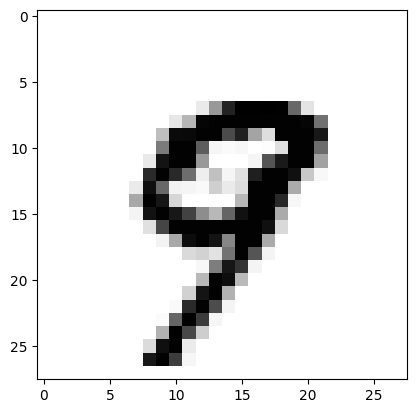

In [ ]:
plt.imshow(X, cmap = 'Greys')

In [ ]:
y_train[87]

np.uint8(9)

## 2.4 Formatting the Output
We might think that the function we want to learn should have a form like this:

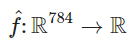

Actually, this isn't ideal! Why? For example, if our input
𝑥 is an image of the digit 0, due to the inherent errors in the trained neural network, we might get something like:

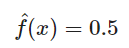

Does this mean it's possible that the digit is 0, but also possibly 1? But 0 and 1 don't look alike at all! In other words, this approach to classification is actually unreasonable.

Therefore, we use "1-hot encoding", which means:

1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0]

and so on.

Since classification problems generally require this, Keras has already prepared a package to handle it for us!

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

We come to see the result of pic index number 87

In [ ]:
y_train[87]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

## 3. Building the First Neural Network

We've decided that our function will be of the form:

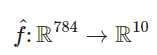

(Insert your desired function here)
(Insert your desired function here)
Since we said we would try a standard neural network for the first attempt, we only need to decide how many hidden layers we want, how many neurons per layer, and which activation function to use.

3.1 Deciding the Neural Network Architecture and Importing Relevant Packages
Suppose we want to do the following:

Activation function:  use sigmoid
Now, let's import the relevant packages from tf.Keras.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import regularizers

In [ ]:
model = Sequential()

In [ ]:
# ---- Layer 1 ----
l2_strength = 0.001 # Initialize l2_strength
model.add(Dense(100, input_dim=784,
                #kernel_regularizer=regularizers.l2(l2_strength),
                #use_bias=False))
       ))       #
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# ---- Layer 2 ----
model.add(Dense(80,
                #kernel_regularizer=regularizers.l2(l2_strength),
                #use_bias=False))
))

model.add(Activation('relu'))
model.add(Dropout(0.2))

# ---- Layer 3 ----
model.add(Dense(40
                #kernel_regularizer=regularizers.l2(l2_strength),
                #use_bias=False))
))

model.add(Activation('relu'))
model.add(Dropout(0.2))

# ---- Output Layer ----
model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,630 (354.02 KB)

 Trainable params: 90,430 (353.24 KB)

 Non-trainable params: 200 (800.00 B)

## 5. Training

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7544 - loss: 0.7742 - val_accuracy: 0.9482 - val_loss: 0.1683
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9184 - loss: 0.2889 - val_accuracy: 0.9621 - val_loss: 0.1261
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9361 - loss: 0.2248 - val_accuracy: 0.9649 - val_loss: 0.1222
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9415 - loss: 0.1981 - val_accuracy: 0.9699 - val_loss: 0.1033
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9516 - loss: 0.1663 - val_accuracy: 0.9710 - val_loss: 0.0987
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9554 - loss: 0.1587 - val_accuracy: 0.9705 - val_loss: 0.0965
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9563 - loss: 0.1480 - val_accuracy: 0.9741 - val_loss: 0.0893
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9577 - loss: 0.1394 -

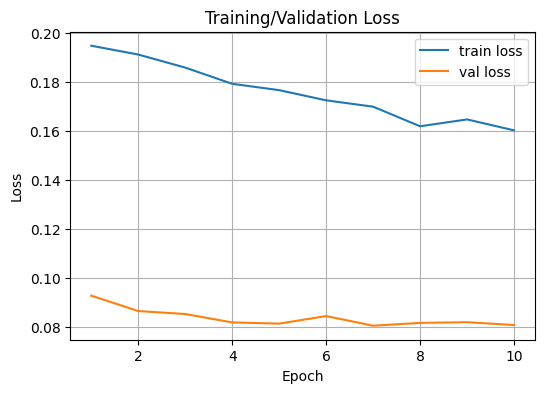

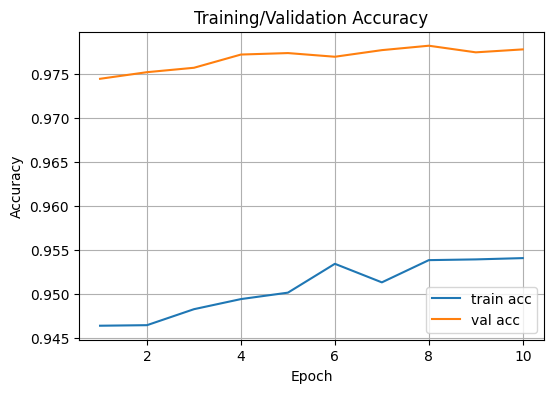

In [ ]:
# ==== Convergence plots ====
import matplotlib.pyplot as plt


hist = history.history
epochs = range(1, len(hist['loss']) + 1)

# Loss
plt.figure(figsize=(6,4))
plt.plot(epochs, hist['loss'], label='train loss')
if 'val_loss' in hist:
    plt.plot(epochs, hist['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training/Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy
acc_key = 'accuracy' if 'accuracy' in hist else 'acc'
val_acc_key = 'val_accuracy' if 'val_accuracy' in hist else ('val_acc' if 'val_acc' in hist else None)

plt.figure(figsize=(6,4))
plt.plot(epochs, hist[acc_key], label='train acc')
if val_acc_key is not None:
    plt.plot(epochs, hist[val_acc_key], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training/Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## 6. Prediction (testing)

In [ ]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


NN predict it is: 6


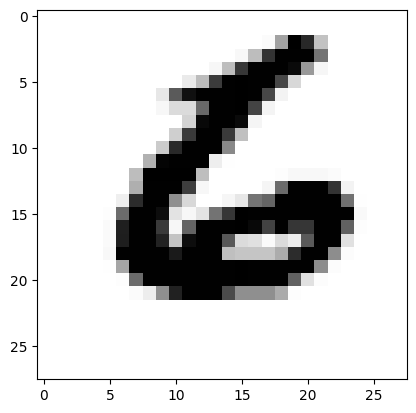

In [ ]:
n = 9999

print('NN predict it is:', y_predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

In [ ]:
from ipywidgets import interact_manual
def test(pic_number):
    plt.imshow(x_test[pic_number].reshape(28,28), cmap='Greys')
    print('NN identify that is:', y_predict[pic_number])

interact_manual(test, pic_number=(0, 9999));

interactive(children=(IntSlider(value=4999, description='pic_number', max=9999), Button(description='Run Inter…

In [ ]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7695 - loss: 0.8061


In [ ]:
print('loss:', score[0])
print('Accuracy', score[1])

loss: 0.7580059766769409
Accuracy 0.7889000177383423


In [ ]:
# ==== Confusion Matrix & Classification Report ====
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Get the prediction results
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

# y_test
if y_test.ndim > 1 and y_test.shape[-1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix (counts):\n", cm)

# Visualization
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
num_classes = cm.shape[0]
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the numbers in the confusion matrix table
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(cm[i, j]),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Show the percentage in the confusion matrix table
cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(6,6))
plt.imshow(cm_norm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix (row-normalized)')
plt.colorbar()
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted')
plt.ylabel('True')
thresh = cm_norm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, f"{cm_norm[i, j]:.2f}",
                 ha="center", va="center",
                 color="white" if cm_norm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Classification report（precision / recall / f1 / support）
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))



In [ ]:
score

### 7. Save our model

If we are satisfied with the training results, we certainly don't want to train it again every time! We can save both the architecture of the neural network and the trained parameters for future use.

On Colab, we first need to connect to our Google Drive.

In [ ]:
model.save('my_dnn_model.keras')

### 8. Calibration

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8270 - loss: 0.6332 - val_accuracy: 0.9622 - val_loss: 0.1395
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9540 - loss: 0.1584 - val_accuracy: 0.9705 - val_loss: 0.1046
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9683 - loss: 0.1032 - val_accuracy: 0.9753 - val_loss: 0.0862
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9791 - loss: 0.0730 - val_accuracy: 0.9752 - val_loss: 0.0846
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9824 - loss: 0.0584 - val_accuracy: 0.9777 - val_loss: 0.0785
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9864 - loss: 0.0435 - val_accuracy: 0.9768 - val_loss: 0.0805
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9888 - loss: 0.0361 - val_accuracy: 0.9772 - val_loss: 0.0810
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0290 - val_accuracy: 0.9803 - val_

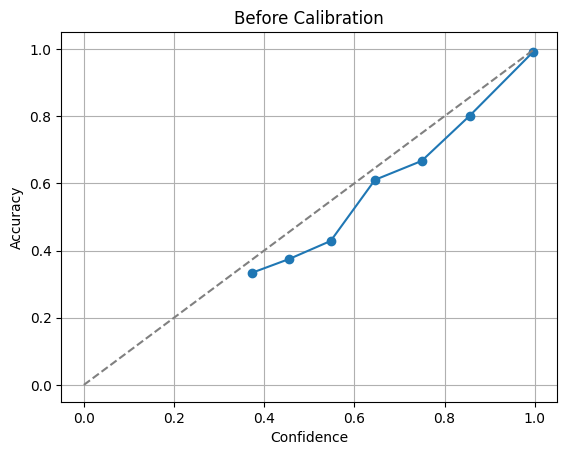

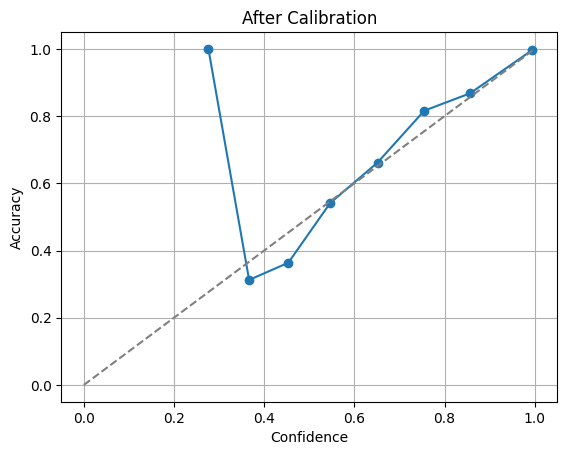

Raw Accuracy: 0.9754
Scaled Accuracy: 0.9754
Mean confidence before: 0.984
Mean confidence after:  0.973


In [ ]:
# === 1. Library imports ===
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

# === 2. Load dataset ===
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

# Split validation set (10%)
x_val = x_train[-6000:]
y_val = y_train[-6000:]
x_train = x_train[:-6000]
y_train = y_train[:-6000]

# === 3. Build the model ===
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # output logits (no softmax)
])

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# === 4. Train the model ===
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

# === 5. Get logits (pre-softmax outputs) ===
val_logits = model.predict(x_val)
test_logits = model.predict(x_test)
val_labels, test_labels = y_val, y_test

# === 6. Define Temperature Scaling class ===
class TemperatureScaler(keras.Model):
    def __init__(self):
        super().__init__()
        # Initialize the temperature parameter T
        self.temperature = tf.Variable(1.5, dtype=tf.float32, trainable=True)

    def call(self, logits):
        # Scale logits by dividing with temperature
        return logits / self.temperature

# === 7. Optimize temperature T (on validation set) ===
scaler = TemperatureScaler()
optimizer = keras.optimizers.LBFGS() if hasattr(keras.optimizers, 'LBFGS') else keras.optimizers.Adam(0.01)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

@tf.function
def train_step():
    with tf.GradientTape() as tape:
        scaled_logits = scaler(val_logits)
        loss = loss_fn(val_labels, scaled_logits)
    grads = tape.gradient(loss, [scaler.temperature])
    optimizer.apply_gradients(zip(grads, [scaler.temperature]))
    return loss

for epoch in range(200):
    loss = train_step()
print(f"Optimal temperature T = {scaler.temperature.numpy():.3f}")

# === 8. Apply temperature scaling ===
scaled_test_logits = scaler(test_logits)
scaled_test_probs = tf.nn.softmax(scaled_test_logits).numpy()
raw_test_probs = tf.nn.softmax(test_logits).numpy()

# === 9. Compute Expected Calibration Error (ECE) ===
def expected_calibration_error(probs, labels, n_bins=15):
    confidences = np.max(probs, axis=1)
    predictions = np.argmax(probs, axis=1)
    accuracies = predictions == labels

    bins = np.linspace(0, 1, n_bins+1)
    ece = 0.0
    for i in range(n_bins):
        mask = (confidences > bins[i]) & (confidences <= bins[i+1])
        if np.any(mask):
            acc_bin = np.mean(accuracies[mask])
            conf_bin = np.mean(confidences[mask])
            ece += np.abs(acc_bin - conf_bin) * np.mean(mask)
    return ece

ece_before = expected_calibration_error(raw_test_probs, test_labels)
ece_after = expected_calibration_error(scaled_test_probs, test_labels)
print(f"ECE before: {ece_before:.4f}, after calibration: {ece_after:.4f}")

# === 10. Reliability diagram ===
def reliability_diagram(probs, labels, title, n_bins=10):
    confidences = np.max(probs, axis=1)
    predictions = np.argmax(probs, axis=1)
    accuracies = predictions == labels

    bins = np.linspace(0.0, 1.0, n_bins+1)
    accs, confs = [], []
    for i in range(len(bins)-1):
        mask = (confidences > bins[i]) & (confidences <= bins[i+1])
        if np.any(mask):
            accs.append(np.mean(accuracies[mask]))
            confs.append(np.mean(confidences[mask]))

    plt.plot(confs, accs, marker='o')
    plt.plot([0,1], [0,1], '--', color='gray')
    plt.xlabel('Confidence')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.grid(True)
    plt.show()

reliability_diagram(raw_test_probs, test_labels, "Before Calibration")
reliability_diagram(scaled_test_probs, test_labels, "After Calibration")

# === 11. Additional metrics: average confidence vs. true accuracy ===
print(f"Raw Accuracy: {accuracy_score(test_labels, np.argmax(raw_test_probs,1)):.4f}")
print(f"Scaled Accuracy: {accuracy_score(test_labels, np.argmax(scaled_test_probs,1)):.4f}")
print(f"Mean confidence before: {np.mean(np.max(raw_test_probs,1)):.3f}")
print(f"Mean confidence after:  {np.mean(np.max(scaled_test_probs,1)):.3f}")


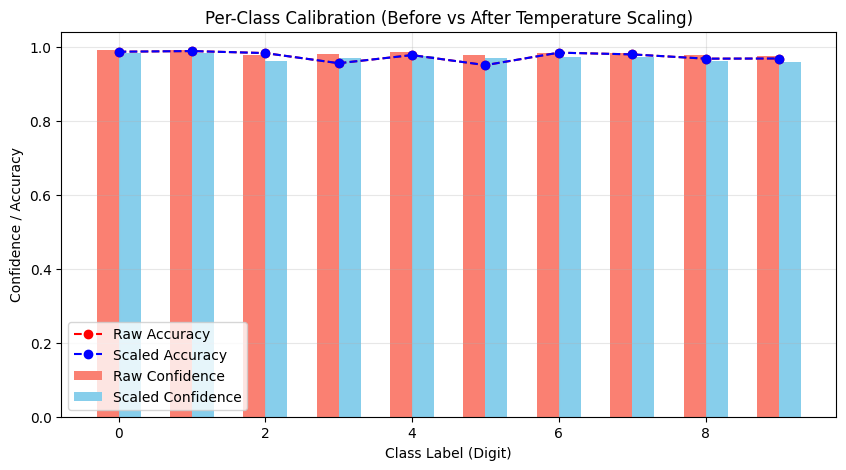

,Class,Raw_PredCount,Raw_PredRatio,Raw_MeanConf,Raw_TrueAcc,Raw_CorrectCount,Scaled_PredCount,Scaled_PredRatio,Scaled_MeanConf,Scaled_TrueAcc,Scaled_CorrectCount,Conf_Diff,Acc_Diff
0,0,976,9.8%,0.992,0.988,964,976,9.8%,0.985,0.988,964,-0.007,+0.000
1,1,1140,11.4%,0.992,0.989,1128,1140,11.4%,0.984,0.989,1128,-0.007,+0.000
2,2,999,10.0%,0.979,0.984,983,999,10.0%,0.963,0.984,983,-0.016,+0.000
3,3,1037,10.4%,0.982,0.957,992,1037,10.4%,0.972,0.957,992,-0.010,+0.000
4,4,980,9.8%,0.986,0.979,959,980,9.8%,0.977,0.979,959,-0.009,+0.000
5,5,926,9.3%,0.979,0.951,881,926,9.3%,0.970,0.951,881,-0.009,+0.000
6,6,944,9.4%,0.985,0.985,930,944,9.4%,0.974,0.985,930,-0.010,+0.000
7,7,1023,10.2%,0.985,0.980,1003,1023,10.2%,0.974,0.980,1003,-0.011,+0.000
8,8,964,9.6%,0.978,0.969,934,964,9.6%,0.963,0.969,934,-0.015,+0.000
9,9,1011,10.1%,0.976,0.969,980,1011,10.1%,0.961,0.969,980,-0.015,+0.000


In [ ]:
# === 12. Class-wise calibration analysis (with count information) ===
import pandas as pd

def classwise_calibration(probs, labels, name="Raw", total_count=None):
    preds = np.argmax(probs, axis=1)
    confs = np.max(probs, axis=1)
    df = pd.DataFrame({'label': labels, 'pred': preds, 'conf': confs})
    total_count = total_count or len(df)

    results = []
    for c in range(10):
        subset = df[df['pred'] == c]
        n_pred = len(subset)                       # Number of samples predicted as this class
        if n_pred > 0:
            mean_conf = subset['conf'].mean()      # Mean confidence for this predicted class
            true_acc = np.mean(subset['label'] == subset['pred'])  # Actual accuracy for this class
            true_count = np.sum(subset['label'] == subset['pred']) # Number of correct predictions
            results.append([
                c,
                n_pred,
                f"{100*n_pred/total_count:.1f}%",  # Percentage of total predictions
                mean_conf,
                true_acc,
                true_count
            ])
        else:
            # If the class was never predicted, fill with NaN / zeros
            results.append([c, 0, "0%", np.nan, np.nan, 0])

    result_df = pd.DataFrame(results, columns=[
        'Class', f'{name}_PredCount', f'{name}_PredRatio',
        f'{name}_MeanConf', f'{name}_TrueAcc', f'{name}_CorrectCount'
    ])
    return result_df

# Compare raw vs temperature-scaled probabilities
total_test = len(test_labels)
raw_df = classwise_calibration(raw_test_probs, test_labels, "Raw", total_test)
scaled_df = classwise_calibration(scaled_test_probs, test_labels, "Scaled", total_test)

# Merge the two DataFrames for comparison
compare_df = raw_df.merge(scaled_df, on='Class')
compare_df['Conf_Diff'] = compare_df['Scaled_MeanConf'] - compare_df['Raw_MeanConf']
compare_df['Acc_Diff'] = compare_df['Scaled_TrueAcc'] - compare_df['Raw_TrueAcc']
#print("\n=== Class-wise Calibration Summary (with counts) ===")
#print(compare_df.round(4))

# === 13. Visualization: per-class confidence vs. true accuracy ===
x = np.arange(10)
plt.figure(figsize=(10,5))
plt.bar(x - 0.15, compare_df['Raw_MeanConf'], width=0.3, label='Raw Confidence', color='salmon')
plt.bar(x + 0.15, compare_df['Scaled_MeanConf'], width=0.3, label='Scaled Confidence', color='skyblue')
plt.plot(x, compare_df['Raw_TrueAcc'], 'r--', marker='o', label='Raw Accuracy')
plt.plot(x, compare_df['Scaled_TrueAcc'], 'b--', marker='o', label='Scaled Accuracy')
plt.xlabel("Class Label (Digit)")
plt.ylabel("Confidence / Accuracy")
plt.title("Per-Class Calibration (Before vs After Temperature Scaling)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# === Improved display style for the summary table ===
def show_styled_table(df):
    styled = (df.style
              .background_gradient(subset=['Raw_MeanConf','Scaled_MeanConf'], cmap='Blues', vmin=0.9, vmax=1.0)
              .background_gradient(subset=['Raw_TrueAcc','Scaled_TrueAcc'], cmap='Greens', vmin=0.9, vmax=1.0)
              .format({
                  'Raw_MeanConf': '{:.3f}', 'Scaled_MeanConf': '{:.3f}',
                  'Raw_TrueAcc': '{:.3f}', 'Scaled_TrueAcc': '{:.3f}',
                  'Conf_Diff': '{:+.3f}', 'Acc_Diff': '{:+.3f}'
              })
              .set_table_styles([
                  {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
                  {'selector': 'td', 'props': [('text-align', 'center')]},
              ])
              .set_caption("🔍 Class-wise Calibration Summary (Before vs After Temperature Scaling)"))
    return styled

show_styled_table(compare_df)


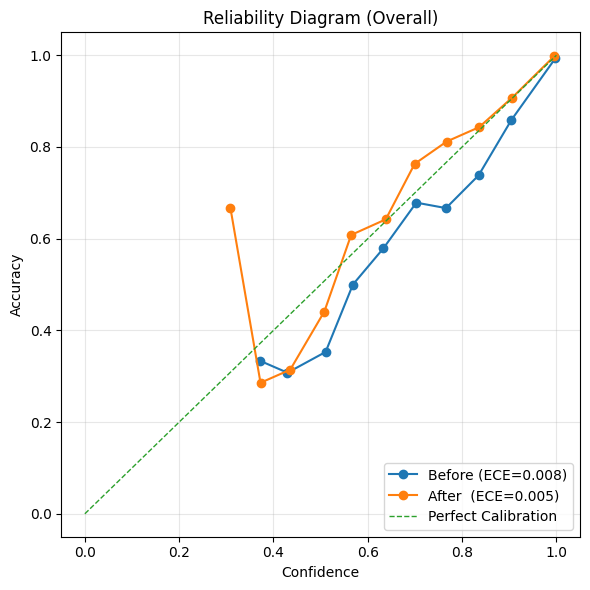

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Utility function: compute ECE and reliability curve points ----
def reliability_points_and_ece(probs, labels, n_bins=15):
    confidences = np.max(probs, axis=1)
    predictions = np.argmax(probs, axis=1)
    accuracies = (predictions == labels).astype(float)

    bin_edges = np.linspace(0.0, 1.0, n_bins + 1)
    bin_centers, bin_acc, bin_conf, bin_frac = [], [], [], []
    ece = 0.0

    # Iterate through bins and calculate average confidence and accuracy per bin
    for i in range(n_bins):
        lo, hi = bin_edges[i], bin_edges[i+1]
        mask = (confidences > lo) & (confidences <= hi)
        if np.any(mask):
            acc_i = accuracies[mask].mean()          # Mean accuracy within the bin
            conf_i = confidences[mask].mean()        # Mean confidence within the bin
            frac_i = mask.mean()                     # Fraction of samples in this bin
            ece += np.abs(acc_i - conf_i) * frac_i   # Weighted calibration error

            bin_centers.append((lo + hi) / 2)
            bin_acc.append(acc_i)
            bin_conf.append(conf_i)
            bin_frac.append(frac_i)

    return np.array(bin_centers), np.array(bin_acc), np.array(bin_conf), float(ece)

# ---- Plot overall reliability diagram ----
centers_b, acc_b, conf_b, ece_b = reliability_points_and_ece(raw_test_probs, test_labels, n_bins=15)
centers_a, acc_a, conf_a, ece_a = reliability_points_and_ece(scaled_test_probs, test_labels, n_bins=15)

plt.figure(figsize=(6,6))
# Use confidence as x-axis and accuracy as y-axis (common format)
plt.plot(conf_b, acc_b, marker='o', label=f'Before (ECE={ece_b:.3f})')
plt.plot(conf_a, acc_a, marker='o', label=f'After  (ECE={ece_a:.3f})')
plt.plot([0,1], [0,1], '--', linewidth=1, label='Perfect Calibration')
plt.xlabel('Confidence')
plt.ylabel('Accuracy')
plt.title('Reliability Diagram (Overall)')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ---- (Optional) Per-class reliability: visualize calibration for each label ----
def classwise_reliability(probs, labels, n_bins=8):
    num_classes = probs.shape[1]
    fig, axes = plt.subplots(2, (num_classes + 1) // 2, figsize=(12,6), sharex=True, sharey=True)
    axes = axes.ravel()

    for c in range(num_classes):
        # Examine the predicted probability for class c and whether the prediction is correct
        conf = probs[:, c]
        correct = (labels == c).astype(float)

        bin_edges = np.linspace(0, 1, n_bins + 1)
        xs, ys = [], []
        for i in range(n_bins):
            lo, hi = bin_edges[i], bin_edges[i+1]
            mask = (conf > lo) & (conf <= hi)
            if np.any(mask):
                xs.append(conf[mask].mean())         # Mean confidence per bin
                ys.append(correct[mask].mean())      # Mean accuracy per bin

        ax = axes[c]
        ax.plot(xs, ys, marker='o')
        ax.plot([0,1], [0,1], '--', linewidth=1)
        ax.set_title(f'Class {c}')
        ax.grid(True, alpha=0.2)

    fig.suptitle('Per-Class Reliability (Using Each Class Probability)')
    for ax in axes:
        ax.set_xlabel('Confidence')
        ax.set_ylabel('Accuracy')
    plt.tight_layout()
    plt.show()

# Uncomment below to visualize per-class reliability
# classwise_reliability(raw_test_probs, test_labels, n_bins=8)
# classwise_reliability(scaled_test_probs, test_labels, n_bins=8)
